<a href="https://colab.research.google.com/github/MustafaGurbuz/ArtificleIntelligence/blob/master/BrainCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import os
import string

print(os.listdir("/content/drive/My Drive/YZHomeWork/beyin_tümörü"))

ImageWidth = 75
ImageHeight = 75
ImageSize = (ImageWidth, ImageHeight)
ImageChannels = 3

['evet', 'hayır']


Using TensorFlow backend.


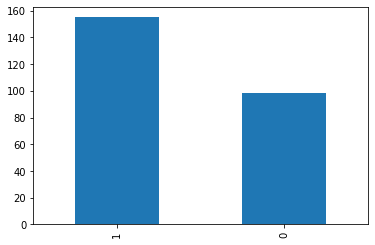

In [0]:
fileNames = os.listdir("/content/drive/My Drive/YZHomeWork/beyin_tümörü/evet")
categories = []
for filename in fileNames:
    category = filename.split(' ')[0]
    if category == 'yes':
        categories.append(1)
    else:
        categories.append(0)
df = pd.DataFrame({
        'filename' : fileNames,
        'category' : categories
    })

df["category"].value_counts().plot.bar()

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), activation ='relu',input_shape=(ImageWidth,ImageHeight, ImageChannels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 73, 73, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 34, 34, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)       

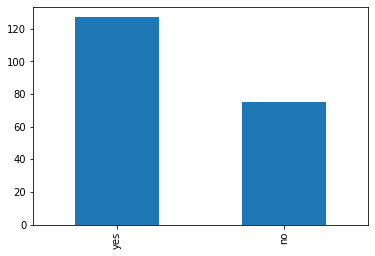

In [0]:
df["category"] = df["category"].replace({0: "no", 1: "yes"})
train_df, validate_df = train_test_split(df,test_size=0.2)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

train_df["category"].value_counts().plot.bar()

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 15

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/content/drive/My Drive/YZHomeWork/beyin_tümörü/evet/",
    x_col='filename',
    y_col='category',
    target_size=ImageSize,
    class_mode='categorical',
    batch_size=batch_size
)

Found 202 validated image filenames belonging to 2 classes.


In [0]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/drive/My Drive/YZHomeWork/beyin_tümörü/evet/",
    x_col='filename',
    y_col='category',
    target_size=ImageSize,
    class_mode='categorical',
    batch_size=batch_size
)


epochs=75
history=model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate,
    steps_per_epoch=total_train
    )

Found 51 validated image filenames belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
202/202 [==============================] - 203s 1s/step - loss: 0.8622 - accuracy: 0.7066 - val_loss: 0.9535 - val_accuracy: 0.5266
Epoch 2/75
202/202 [==============================] - 60s 299ms/step - loss: 0.5286 - accuracy: 0.7752 - val_loss: 0.7333 - val_accuracy: 0.7260
Epoch 3/75
202/202 [==============================] - 60s 297ms/step - loss: 0.4303 - accuracy: 0.8265 - val_loss: 0.9362 - val_accuracy: 0.7428
Epoch 4/75
202/202 [==============================] - 60s 297ms/step - loss: 0.3891 - accuracy: 0.8430 - val_loss: 1.1627 - val_accuracy: 0.7245
Epoch 5/75
202/202 [==============================] - 60s 295ms/step - loss: 0.3211 - accuracy: 0.8684 - val_loss: 2.9326 - val_accuracy: 0.4932
Epoch 6/75
202/202 [==============================] - 59s 293ms/step - loss: 0.2988 - accuracy: 0.8756 - val_loss: 0.6147 - val_accuracy: 0.78

In [0]:
test_filenames=os.listdir("/content/drive/My Drive/YZHomeWork/beyin_tümörü/hayır/")
test_df=pd.DataFrame({
    'filename': test_filenames
    })
nb_samples=test_df.shape[0]

test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
   "/content/drive/My Drive/YZHomeWork/beyin_tümörü/hayır/",
    x_col='filename',
    y_col=None,
    target_size=ImageSize,
    class_mode=None,
    batch_size=batch_size,
    shuffle=False
)

predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

test_df['category']=np.argmax(predict, axis=-1)
label_map= dict((v, k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

Found 99 validated image filenames.
Instructions for updating:
Please use Model.predict, which supports generators.


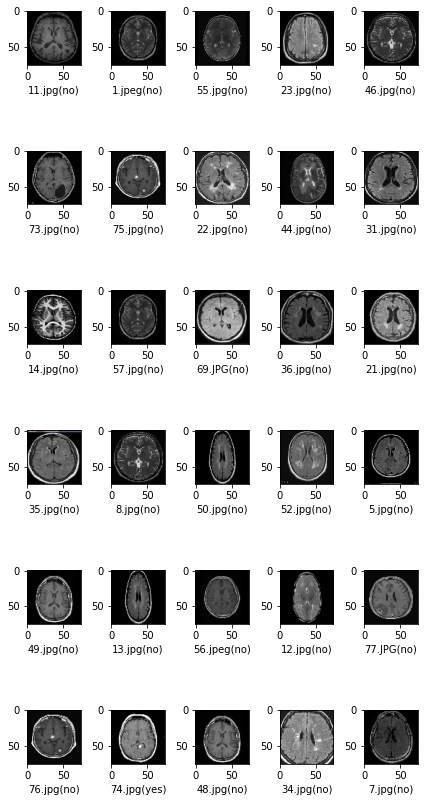

In [0]:
import matplotlib.pyplot as plt

sample_test = test_df.head(30)
sample_test.head()
plt.figure(figsize=(6,12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img( "/content/drive/My Drive/YZHomeWork/beyin_tümörü/hayır/"+
                       filename, target_size=ImageSize)
    plt.subplot(6, 5, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()
